# Project 1 - Real Estate

DESCRIPTION

#### Problem Statement
 

- A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis. 
- The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.
- A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.
- The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics described here do not limit the dashboard to these few.

#### Dataset Description
 
  
| Variables | Description |
| --- | --- | 
| Second mortgage: | Households with a second mortgage statistics |
| Home equity: | Households with a home equity loan statistics |
| Debt: | Households with any type of debt statistics |
| Mortgage Costs: | Statistics regarding mortgage payments, home equity loans, utilities, and property taxes |
| Home Owner Costs: | Sum of utilities, and property taxes statistics |
| Gross Rent: | Contract rent plus the estimated average monthly cost of utility features |
| High school Graduation: | High school graduation statistics |
| Population Demographics: | Population demographics statistics |
| Age Demographics: | Age demographic statistics |
| Household Income: | Total income of people residing in the household |
| Family Income: | Total income of people related to the householder |

### Project Task: Week 1
Data Import and Preparation:

1. Import data.
2. Figure out the primary key and look for the requirement of indexing.
3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

__Exploratory Data Analysis (EDA):__

4.Perform debt analysis. You may take the following steps:

a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage c) Create pie charts to show overall debt and bad debt

d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

e) Create a collated income distribution chart for family income, house hold income, and remaining income

### Project Task: Week 2
__Exploratory Data Analysis (EDA):__

1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

    a) Use pop and ALand variables to create a new field called population density

    b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age 
    
    c) Visualize the findings using appropriate chart type


2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

    a) Analyze the married, separated, and divorced population for these population brackets

    b) Visualize using appropriate chart type


3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.


4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

### Project Task: Week 3
__Data Pre-processing:__

1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:

    • Highschool graduation rates

    • Median population age

    • Second mortgage statistics

    • Percent own

    • Bad debt expense

### Project Task: Week 4
__Data Modeling:__

1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

    a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

    b) Run another model at State level. There are 52 states in USA.

    c) Keep below considerations while building a linear regression model. Data Modeling :

    • Variables should have significant impact on predicting Monthly mortgage and owner costs

    • Utilize all predictor variable to start with initial hypothesis

    • R square of 60 percent and above should be achieved

    • Ensure Multi-collinearity does not exist in dependent variables

    • Test if predicted variable is normally distributed

### Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a) Box plot of distribution of average rent by type of place (village, urban, town, etc.).

b) Pie charts to show overall debt and bad debt.

c) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

d) Heat map for correlation matrix.

e) Pie chart to show the population distribution across different types of places (village, urban, town etc.)        

Import libraries

In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

### 1. Import data

Import the real estate training and testing datasets

In [2]:
df_train=pd.read_csv("train_real estate.csv")
df_test=pd.read_csv("test_real estate.csv")

In [3]:
# check the column labels of the train dataframe
df_train.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [4]:
# check the column labels of the test dataframe
df_test.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [5]:
# view the top 3 rows of the training data
df_train.head(3)

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID     state state_ab  \
0  267822      NaN       140        53       36  New York       NY   
1  246444      NaN       140       141       18   Indiana       IN   
2  245683      NaN       140        63       18   Indiana       IN   

         city     place  type  ... female_age_mean  female_age_median  \
0    Hamilton  Hamilton  City  ...        44.48629           45.33333   
1  South Bend  Roseland  City  ...        36.48391           37.58333   
2    Danville  Danville  City  ...        42.15810           42.83333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  

[3 rows x 80 columns]

In [6]:
# view the top 3 rows of the testing data
df_test.head(3)

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   

        city                  place     type  ... female_age_mean  \
0    Detroit  Dearborn Heights City      CDP  ...        34.78682   
1     Auburn            Auburn City     City  ...        44.23451   
2  Pine City              Millerton  Borough  ...        41.62426   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           33.75000          21.58531                 416.48097   
1           46.66667          22.37036                 532.03505   
2           44.50000          22.86213                 453.11959   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1              1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2              1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  

[3 rows x 80 columns]

In [7]:
# view statistical details of the training data
df_train.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   27321.000000      0.0   27321.0  27321.000000  27321.000000   
mean   257331.996303      NaN     140.0     85.646426     28.271806   
std     21343.859725      NaN       0.0     98.333097     16.392846   
min    220342.000000      NaN     140.0      1.000000      1.000000   
25%    238816.000000      NaN     140.0     29.000000     13.000000   
50%    257220.000000      NaN     140.0     63.000000     28.000000   
75%    275818.000000      NaN     140.0    109.000000     42.000000   
max    294334.000000      NaN     140.0    840.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  27321.000000  27321.000000  27321.000000  27321.000000  2.732100e+04   
mean   50081.999524    596.507668     37.508813    -91.288394  1.295106e+08   
std    29558.115660    232.497482      5.588268     16.343816  1.275531e+09   
min      602.000000    201.000000     17.929085   -165.453872  4.113400e+04   
25%    26554.000000    405.000000     33.899064    -97.816067  1.799408e+06   
50%    47715.000000    614.000000     38.755183    -86.554374  4.866940e+06   
75%    77093.000000    801.000000     41.380606    -79.782503  3.359820e+07   
max    99925.000000    989.000000     67.074018    -65.379332  1.039510e+11   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     27115.000000       27115.000000      27115.000000   
mean   ...        40.319803          40.355099         22.178745   
std    ...         5.886317           8.039585          2.540257   
min    ...        16.008330          13.250000          0.556780   
25%    ...        36.892050          34.916670         21.312135   
50%    ...        40.373320          40.583330         22.514410   
75%    ...        43.567120          45.416670         23.575260   
max    ...        79.837390          82.250000         30.241270   

       female_age_sample_weight  female_age_samples       pct_own  \
count              27115.000000        27115.000000  27053.000000   
mean                 544.238432         2208.761903      0.640434   
std                  283.546896         1089.316999      0.226640   
min                    0.664700            2.000000      0.000000   
25%                  355.995825         1471.000000      0.502780   
50%                  503.643890         2066.000000      0.690840   
75%                  680.275055         2772.000000      0.817460   
max                 6197.995200        27250.000000      1.000000   

            married   married_snp     separated      divorced  
count  27130.000000  27130.000000  27130.000000  27130.000000  
mean       0.508300      0.047537      0.019089      0.100248  
std        0.136860      0.037640      0.020796      0.049055  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.425102      0.020810      0.004530      0.065800  
50%        0.526665      0.038840      0.013460      0.095205  
75%        0.605760      0.065100      0.027487      0.129000  
max        1.000000      0.714290      0.714290      1.000000  

[8 rows x 74 columns]

In [8]:
# view statistical details of the training data
df_test.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   11709.000000      0.0   11709.0  11709.000000  11709.000000   
mean   257525.004783      NaN     140.0     85.710650     28.489196   
std     21466.372658      NaN       0.0     99.304334     16.607262   
min    220336.000000      NaN     140.0      1.000000      1.000000   
25%    238819.000000      NaN     140.0     29.000000     13.000000   
50%    257651.000000      NaN     140.0     61.000000     28.000000   
75%    276300.000000      NaN     140.0    109.000000     42.000000   
max    294333.000000      NaN     140.0    810.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  11709.000000  11709.000000  11709.000000  11709.000000  1.170900e+04   
mean   50123.418396    593.598514     37.405491    -91.340229  1.095500e+08   
std    29775.134038    232.074263      5.625904     16.407818  7.624940e+08   
min      601.000000    201.000000     17.965835   -166.770979  8.299000e+03   
25%    25570.000000    404.000000     33.919813    -97.816561  1.718660e+06   
50%    47362.000000    612.000000     38.618092    -86.643344  4.835000e+06   
75%    77406.000000    787.000000     41.232973    -79.697311  3.204540e+07   
max    99929.000000    989.000000     64.804269    -65.695344  5.520166e+10   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     11613.000000       11613.000000      11613.000000   
mean   ...        40.111999          40.131864         22.148145   
std    ...         5.851192           7.972026          2.554907   
min    ...        15.360240          12.833330          0.737110   
25%    ...        36.729210          34.750000         21.270920   
50%    ...        40.196960          40.333330         22.472990   
75%    ...        43.496490          45.333330         23.549450   
max    ...        90.107940          90.166670         29.626680   

       female_age_sample_weight  female_age_samples       pct_own  \
count              11613.000000        11613.000000  11587.000000   
mean                 550.411243         2233.003186      0.634194   
std                  280.992521         1072.017063      0.232232   
min                    0.251910            3.000000      0.000000   
25%                  363.225840         1499.000000      0.492500   
50%                  509.103610         2099.000000      0.687640   
75%                  685.883910         2800.000000      0.815235   
max                 4145.557870        15466.000000      1.000000   

            married   married_snp     separated      divorced  
count  11625.000000  11625.000000  11625.000000  11625.000000  
mean       0.505632      0.047960      0.019346      0.099191  
std        0.139774      0.038693      0.021428      0.048525  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.422020      0.020890      0.004500      0.064590  
50%        0.525270      0.038680      0.013870      0.094350  
75%        0.605660      0.065340      0.027910      0.128400  
max        1.000000      0.714290      0.714290      0.362750  

[8 rows x 74 columns]

In [9]:
# check the data types in the train dataframe
type_df = df_train.dtypes.reset_index()
type_df.columns = ['count', 'dtypes']
type_df.groupby('dtypes').agg('count').reset_index()

dtypes  count
0    int64     12
1  float64     62
2   object      6

In [10]:
# check the data types in the test dataframe
type_df = df_test.dtypes.reset_index()
type_df.columns = ['count', 'dtypes']
type_df.groupby('dtypes').agg('count').reset_index()

dtypes  count
0    int64     13
1  float64     61
2   object      6

### 2. Figure out the primary key and look for the requirement of indexing

The 'UID' column contains unique location identification values so an index can be created from the UID feature.

In [11]:
# use UID as the index for training dataframe
df_train.set_index(keys=['UID'],inplace=True)

# use UID as index for testing dataframe
df_test.set_index(keys=['UID'],inplace=True)

In [12]:
# check if UID is now the index
df_train.head(3)

BLOCKID  SUMLEVEL  COUNTYID  STATEID     state state_ab        city  \
UID                                                                           
267822      NaN       140        53       36  New York       NY    Hamilton   
246444      NaN       140       141       18   Indiana       IN  South Bend   
245683      NaN       140        63       18   Indiana       IN    Danville   

           place  type primary  ...  female_age_mean  female_age_median  \
UID                             ...                                       
267822  Hamilton  City   tract  ...         44.48629           45.33333   
246444  Roseland  City   tract  ...         36.48391           37.58333   
245683  Danville  City   tract  ...         42.15810           42.83333   

        female_age_stdev  female_age_sample_weight  female_age_samples  \
UID                                                                      
267822          22.51276                 685.33845              2618.0   
246444          23.43353                 267.23367              1284.0   
245683          23.94119                 707.01963              3238.0   

        pct_own  married  married_snp  separated  divorced  
UID                                                         
267822  0.79046  0.57851      0.01882    0.01240   0.08770  
246444  0.52483  0.34886      0.01426    0.01426   0.09030  
245683  0.85331  0.64745      0.02830    0.01607   0.10657  

[3 rows x 79 columns]

In [13]:
# check if UID is now the index
df_test.head(3)

BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
UID                                                                   
255504      NaN       140       163       26      Michigan       MI   
252676      NaN       140         1       23         Maine       ME   
276314      NaN       140        15       42  Pennsylvania       PA   

             city                  place     type primary  ...  \
UID                                                        ...   
255504    Detroit  Dearborn Heights City      CDP   tract  ...   
252676     Auburn            Auburn City     City   tract  ...   
276314  Pine City              Millerton  Borough   tract  ...   

        female_age_mean  female_age_median  female_age_stdev  \
UID                                                            
255504         34.78682           33.75000          21.58531   
252676         44.23451           46.66667          22.37036   
276314         41.62426           44.50000          22.86213   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
255504                 416.48097              1938.0  0.70252  0.28217   
252676                 532.03505              1950.0  0.85128  0.64221   
276314                 453.11959              1879.0  0.81897  0.59961   

        married_snp  separated  divorced  
UID                                       
255504      0.05910    0.03813   0.14299  
252676      0.02338    0.00000   0.13377  
276314      0.01746    0.01358   0.10026  

[3 rows x 79 columns]

### 3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [14]:
# checking for missing values in the training dataframe
def missing_zero_values_table(df_train):
        zero_val = (df_train == 0.00).astype(int).sum(axis=0)
        mis_val = df_train.isnull().sum()
        mis_val_percent = 100 * df_train.isnull().sum() / len(df_train)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df_train)
        mz_table['Data Type'] = df_train.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The selected dataframe has " + str(df_train.shape[1]) + " columns and " + str(df_train.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(df_train)

The selected dataframe has 79 columns and 27321 Rows.
There are 59 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
BLOCKID                                0           27321              100.0   
hc_median                              0             600                2.2   
hc_sample_weight                       0             600                2.2   
hc_samples                             0             600                2.2   
hc_stdev                               0             600                2.2   
hc_mean                                0             600                2.2   
hc_mortgage_median                     0             573                2.1   
hc_mortgage_mean                       0             573                2.1   
hc_mortgage_stdev                      0             573                2.1   
hc_mortgage_sample_weight              0             573                2.1   
hc_mortgage_samples                    0             573                2.1   
debt_cdf                             143             457                1.7   
home_equity_cdf                       12             457                1.7   
second_mortgage_cdf                    5             457                1.7   
debt                                 116             457                1.7   
home_equity                         1518             457                1.7   
second_mortgage                     5135             457                1.7   
home_equity_second_mortgage         6053             457                1.7   
rent_mean                              0             314                1.1   
rent_gt_10                            12             314                1.1   
rent_samples                           0             314                1.1   
rent_sample_weight                     0             314                1.1   
rent_gt_15                            37             314                1.1   
rent_median                            0             314                1.1   
rent_stdev                             0             314                1.1   
rent_gt_40                           522             314                1.1   
rent_gt_50                           961             314                1.1   
rent_gt_20                            72             314                1.1   
rent_gt_25                           136             314                1.1   
rent_gt_30                           244             314                1.1   
rent_gt_35                           376             314                1.1   
family_sample_weight                   0             298                1.1   
family_samples                         0             298                1.1   
family_mean                            0             298                1.1   
family_median                          0             298                1.1   
family_stdev                           0             298                1.1   
hi_median                              0             268                1.0   
hi_mean                                0             268                1.0   
hi_stdev                               0             268                1.0   
hi_sample_weight                       0             268                1.0   
hi_samples                             0             268                1.0   
pct_own                              189             268                1.0   
hs_degree_female                       4             223                0.8   
female_age_mean                        0             206                0.8   
female_age_samples                     0             206                0.8   
female_age_sample_weight               0             206                0.8   
female_age_stdev                       0             206                0.8   
female_age_median                      0             206                0.8   
hs_degree_male                         5             200                0.7   
married                               29             191                0.7   


In [15]:
# checking for missing values in the testing dataframe
def missing_zero_values_table(df_test):
        zero_val = (df_test == 0.00).astype(int).sum(axis=0)
        mis_val = df_test.isnull().sum()
        mis_val_percent = 100 * df_test.isnull().sum() / len(df_test)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df_test)
        mz_table['Data Type'] = df_test.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The selected dataframe has " + str(df_test.shape[1]) + " columns and " + str(df_test.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(df_test)

The selected dataframe has 79 columns and 11709 Rows.
There are 59 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
BLOCKID                                0           11709              100.0   
hc_median                              0             290                2.5   
hc_sample_weight                       0             290                2.5   
hc_samples                             0             290                2.5   
hc_stdev                               0             290                2.5   
hc_mean                                0             290                2.5   
hc_mortgage_samples                    0             268                2.3   
hc_mortgage_sample_weight              0             268                2.3   
hc_mortgage_stdev                      0             268                2.3   
hc_mortgage_median                     0             268                2.3   
hc_mortgage_mean                       0             268                2.3   
second_mortgage_cdf                    2             220                1.9   
home_equity_second_mortgage         2603             220                1.9   
second_mortgage                     2219             220                1.9   
home_equity                          667             220                1.9   
debt                                  48             220                1.9   
home_equity_cdf                        7             220                1.9   
debt_cdf                              70             220                1.9   
rent_gt_50                           387             149                1.3   
rent_gt_40                           222             149                1.3   
rent_gt_15                            13             149                1.3   
rent_gt_35                           166             149                1.3   
rent_gt_30                           119             149                1.3   
rent_gt_25                            67             149                1.3   
rent_gt_20                            34             149                1.3   
rent_gt_10                             7             149                1.3   
rent_samples                           0             148                1.3   
rent_median                            0             148                1.3   
rent_sample_weight                     0             148                1.3   
rent_stdev                             0             148                1.3   
rent_mean                              0             148                1.3   
family_sample_weight                   0             136                1.2   
family_stdev                           0             136                1.2   
family_median                          0             136                1.2   
family_mean                            0             136                1.2   
family_samples                         0             136                1.2   
pct_own                               98             122                1.0   
hi_samples                             0             122                1.0   
hi_sample_weight                       0             122                1.0   
hi_stdev                               0             122                1.0   
hi_median                              0             122                1.0   
hi_mean                                0             122                1.0   
hs_degree_female                       0             105                0.9   
female_age_stdev                       0              96                0.8   
female_age_median                      0              96                0.8   
female_age_mean                        0              96                0.8   
female_age_sample_weight               0              96                0.8   
female_age_samples                     0              96                0.8   
hs_degree_male                         1              89                0.8   
hs_degree                              1              85                0.7   


The BLOCKID column will be dropped from the train and test datasets since it has no value i.e. it has 100% missing values

In [16]:
# identifying features with 0 variance in the train dataframe

df_num = df_train.loc[:,df_train.dtypes==np.int64]

temp = []
for i in df_num.columns:
    if df_train[i].var()==0:
        temp.append(i)
        
print(len(temp))
print(temp)

1
['SUMLEVEL']


In [17]:
# identifying features with 0 variance in the test dataframe

df_num1 = df_test.loc[:,df_test.dtypes==np.int64]
temp1 = []
for i in df_num1.columns:
    if df_test[i].var()==0:
        temp1.append(i)
        
print(len(temp1))
print(temp1)

1
['SUMLEVEL']


The SUMLEVEL column has 0 variance and will be dropped from the train and test datasets.

In [18]:
# dropping the BLOCKID and SUMLEVEL columns from the train dataframe
df_train.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True) 

In [19]:
# dropping the BLOCKID and SUMLEVEL columns from the test dataframe
df_test.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True) 

Missing values will be filled with the column mean for both the train and test dataframes

In [20]:
# filling the missing values with the mean
missing_train_cols=[]
for col in df_train.columns:
    if df_train[col].isna().sum() !=0:
         missing_train_cols.append(col)
print(missing_train_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [21]:
# filling the missing values with the mean
missing_test_cols=[]
for col in df_test.columns:
    if df_test[col].isna().sum() !=0:
         missing_test_cols.append(col)
print(missing_test_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [22]:
# Missing columns are all numerical variables
for col in df_train.columns:
    if col in (missing_train_cols):
        df_train[col].replace(np.nan, df_train[col].mean(),inplace=True)

In [23]:
# Missing columns are all numerical variables
for col in df_test.columns:
    if col in (missing_test_cols):
        df_test[col].replace(np.nan, df_test[col].mean(),inplace=True)

In [24]:
df_train.isna().sum().sum()

0

In [25]:
df_test.isna().sum().sum()

0

### 4.	Understanding homeowner costs are incredibly valuable because it is positively correlated to consumer spending which drives the economy through disposable income. Perform debt analysis. You may want to follow the following steps:

#### Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [26]:
#!pip install pandasql
from pandasql import sqldf
q1 = "select place,pct_own,second_mortgage,lat,lng from df_train where pct_own>0.10 and second_mortgage<0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
df_train_sec_mort_pct_own=pysqldf(q1)

In [27]:
df_train_sec_mort_pct_own.head()

place  pct_own  second_mortgage        lat        lng
0   Worcester City  0.20247          0.43363  42.254262 -71.800347
1     Harbor Hills  0.15618          0.31818  40.751809 -73.853582
2      Glen Burnie  0.22380          0.30212  39.127273 -76.635265
3  Egypt Lake-leto  0.11618          0.28972  28.029063 -82.495395
4      Lincolnwood  0.14228          0.28899  41.967289 -87.652434

In [28]:
# export the created dataframe for tableau part of the project
# df_train_sec_mort_pct_own.to_csv('top 2500 locations')

In [29]:
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

In [30]:
fig = go.Figure(data=go.Scattergeo(
    lat = df_train_sec_mort_pct_own['lat'],
    lon = df_train_sec_mort_pct_own['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with the highest second mortgage and percent ownership above 10%')
fig.show()

#### Use the following bad debt equation: 
Bad Debt = P (Second Mortgage ∩ Home Equity Loan) 

Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 

#### Create pie charts to show overall debt and bad debt

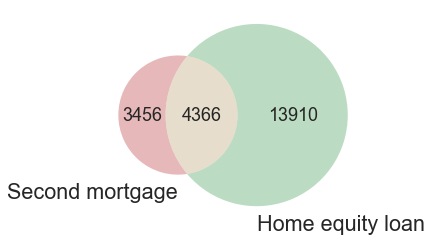

In [31]:
second_mortgage_list=df_train['second_mortgage'].values.tolist()
home_equity_list = (df_train['home_equity']-df_train['home_equity_second_mortgage']).values.tolist()
from matplotlib_venn import venn2

def venn_diagram(a, b, labels=['Second mortgage', 'Home equity loan']):
    
    a = list(set(a))
    b = list(set(b))
    
    only_a = len( [x for x in a if x not in b] )
    only_b = len( [x for x in b if x not in a] )
  
    a_b = len(np.intersect1d(a, b))
    
    venn2(subsets=(only_a, only_b, a_b), set_labels=labels)    

venn_diagram(second_mortgage_list, home_equity_list)

In [32]:
df_train['bad_debt'] = df_train['second_mortgage'] + df_train['home_equity'] - df_train['home_equity_second_mortgage']

In [33]:
bad_debt_list = df_train['bad_debt'].values.tolist()
good_debt_list = (df_train['debt']-df_train['bad_debt']).values.tolist()
debt_list = df_train['debt'].values.tolist()

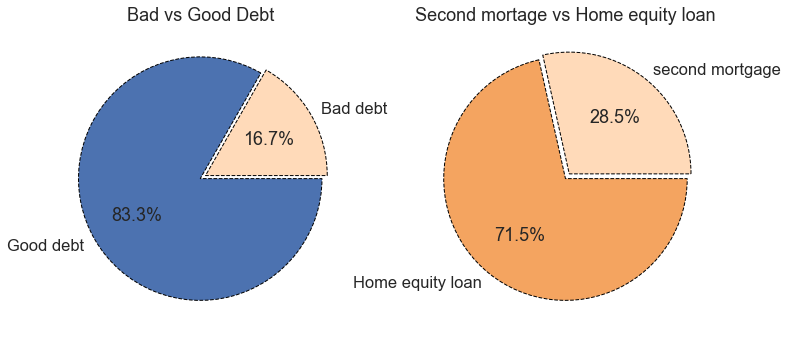

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,10))
labels = ['Bad debt', 'Good debt']
bad_debt_pct = (df_train['bad_debt'].sum()/df_train['debt'].sum()*100)
values = [bad_debt_pct, (100-bad_debt_pct)]
explode = [0.05, 0]
colors = ['peachpuff', 'b']
ax1.pie(values, labels=labels, autopct='%.1f%%', explode=explode, colors=colors, startangle=0,
        wedgeprops={"edgecolor":"0",'linewidth': 1,
                    'linestyle': 'dashed', 'antialiased': True})
ax1.set_title('Bad vs Good Debt')

labels = ['second mortgage', 'Home equity loan']
bad_debt_pct = (df_train['second_mortgage'].sum()/df_train['bad_debt'].sum()*100)
values = [bad_debt_pct, (100-bad_debt_pct)]
explode = [0.05, 0]
colors = ['peachpuff', 'sandybrown']
ax2.pie(values, labels=labels, autopct='%.1f%%', explode=explode, colors=colors, startangle=0,
        wedgeprops={"edgecolor":"0",'linewidth': 1,
                    'linestyle': 'dashed', 'antialiased': True})
ax2.set_title('Second mortage vs Home equity loan')

plt.show()

#### Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

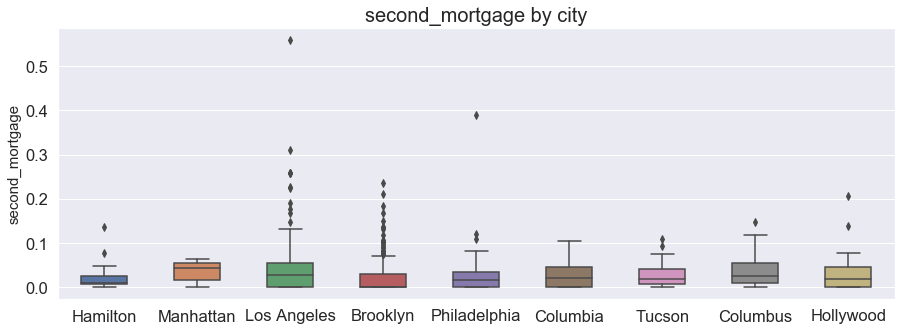

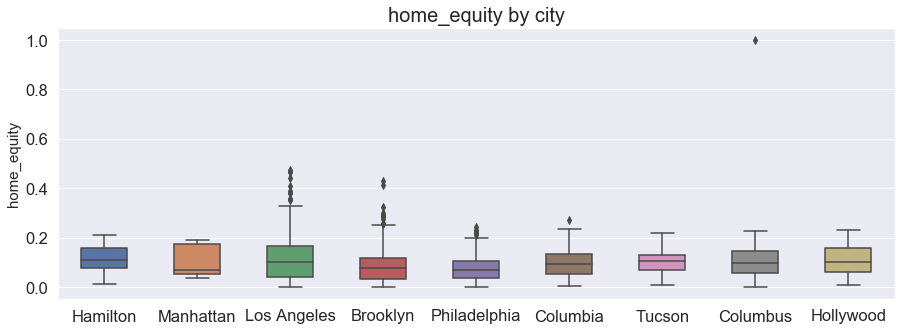

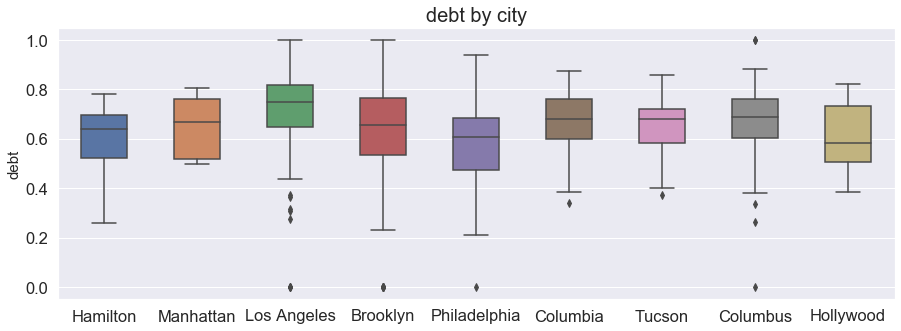

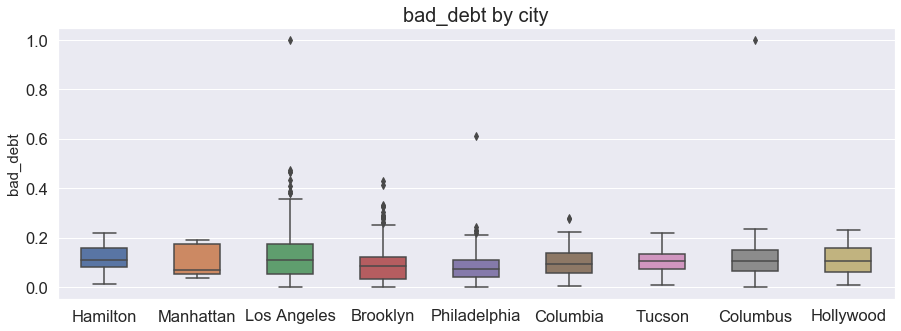

In [35]:
df_box_hamilton=df_train.loc[df_train['city'] == 'Hamilton']
df_box_manhattan=df_train.loc[df_train['city'] == 'Manhattan']
df_box_LA=df_train.loc[df_train['city'] == 'Los Angeles']
df_box_Brooklyn=df_train.loc[df_train['city'] == 'Brooklyn']
df_box_Philadelphia=df_train.loc[df_train['city'] == 'Philadelphia']
df_box_Columbia=df_train.loc[df_train['city'] == 'Columbia']
df_box_Tucson=df_train.loc[df_train['city'] == 'Tucson']
df_box_Columbus=df_train.loc[df_train['city'] == 'Columbus']
df_box_Hollywood=df_train.loc[df_train['city'] == 'Hollywood']
df_box_city=pd.concat([df_box_hamilton, df_box_manhattan, df_box_LA, df_box_Brooklyn, df_box_Philadelphia, df_box_Columbia, df_box_Tucson, df_box_Columbus, df_box_Hollywood])

column_names = ['second_mortgage','home_equity','debt','bad_debt']
for column in column_names:
    plt.figure(figsize=(15,5))
    sns.boxplot(x='city', y=column, width=0.5, data=df_box_city)
    plt.title(column + ' by city', fontsize=20)
    plt.xlabel('', fontsize=15)
    plt.ylabel(column, fontsize=15)
    plt.show()

#### Create a collated income distribution chart for family income, house hold income, and remaining income

The data is skewed so the median values will be used for the distribution charts instead of mean.

To calculate the remaining income, we'll substract the debt from the family income.

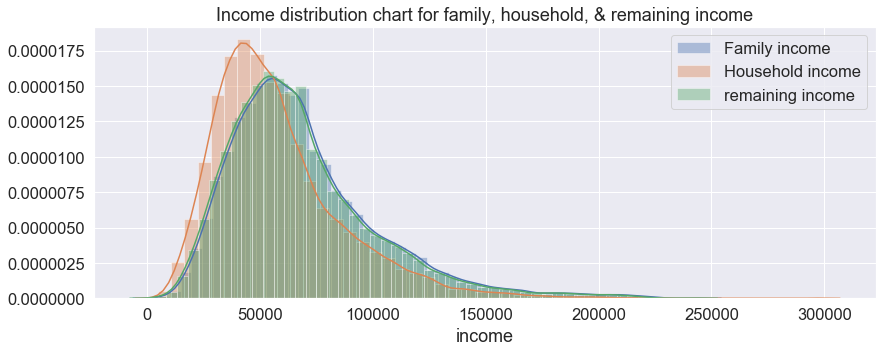

In [36]:
plt.figure(figsize=(14,5))
sns.distplot(df_train['family_median'], label='Family income')
sns.distplot(df_train['hi_median'], label='Household income')
sns.distplot(df_train['family_median']-df_train['hc_mortgage_median'], label='remaining income')
plt.title('Income distribution chart for family, household, & remaining income')
plt.xlabel('income')
plt.legend()
plt.show()


### 5. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):
- Population density (hint-use ‘pop’ and ‘Aland’ to calculate)
- median age (hint-use the variables ‘male_age_median’, ‘female_age_median’, ‘male_pop’, ‘female_pop’)

Visualize the findings using appropriate chart type.


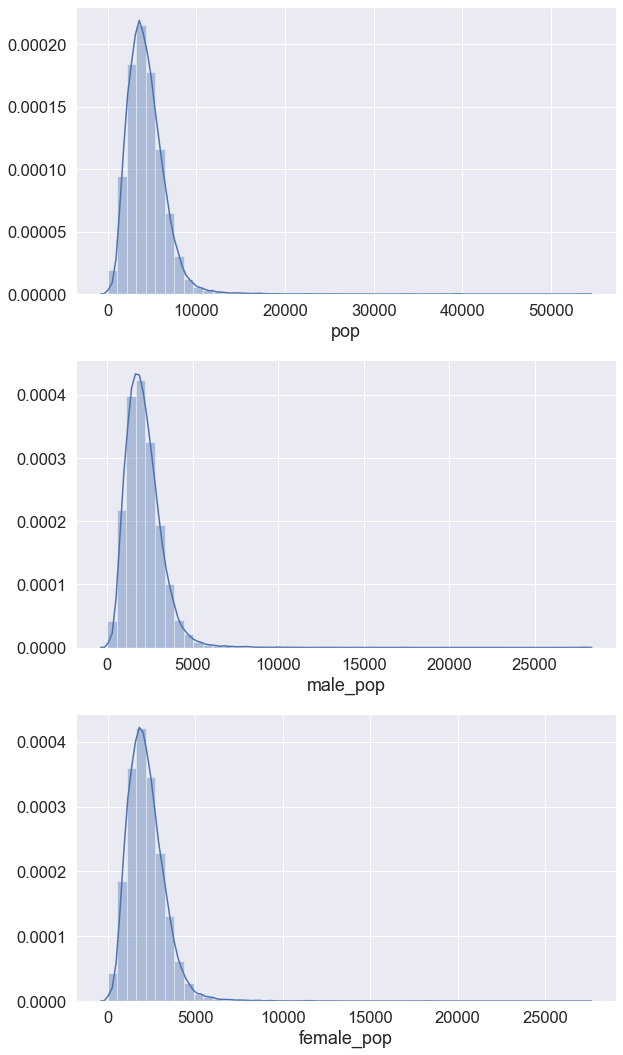

In [37]:
#plt.figure(figsize=(25,10))
fig,(ax1,ax2,ax3)=plt.subplots(3,1, figsize=(9,15))
sns.distplot(df_train['pop'],ax=ax1)
sns.distplot(df_train['male_pop'],ax=ax2)
sns.distplot(df_train['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

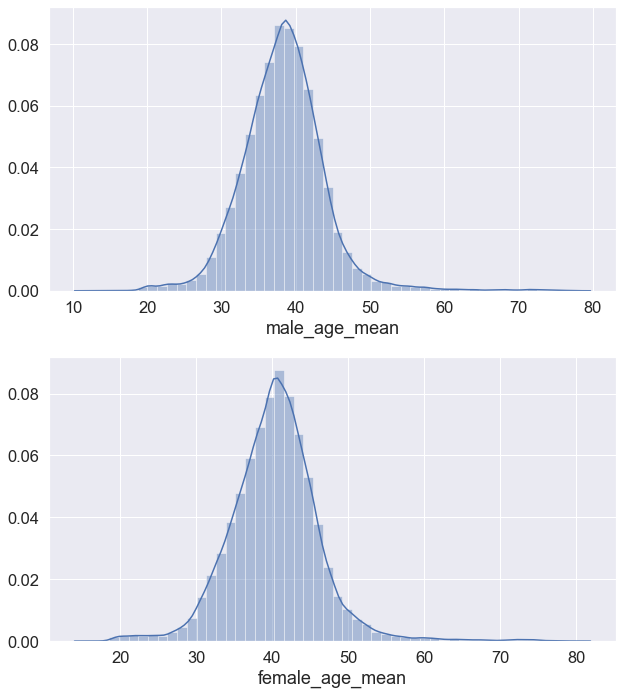

In [38]:
#plt.figure(figsize=(25,10))

fig,(ax1,ax2)=plt.subplots(2,1, figsize=(9,10))
sns.distplot(df_train['male_age_mean'],ax=ax1)
sns.distplot(df_train['female_age_mean'],ax=ax2)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

#### Use pop and ALand variables to create a new field called population density

Calculating the population density = number of people per square area (excluding areas of water)

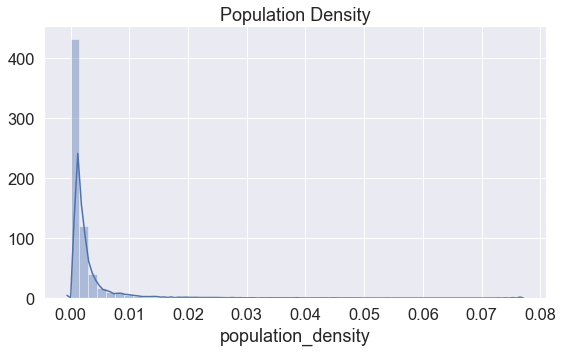

In [39]:
df_train['population_density'] = df_train['pop']/df_train['ALand']
df_test['population_density'] = df_test['pop']/df_test['ALand']

plt.figure(figsize=(9,5))
sns.distplot(df_train['population_density'])
plt.title('Population Density')
plt.show()  

#### Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age 

In [40]:
df_train['age_median']=(df_train['male_age_median']+df_train['female_age_median'])/2
df_test['age_median']=(df_test['male_age_median']+df_test['female_age_median'])/2

In [41]:
df_train[['male_age_median','female_age_median','male_pop','female_pop','age_median']].head()

male_age_median  female_age_median  male_pop  female_pop  age_median
UID                                                                         
267822         44.00000           45.33333      2612        2618   44.666665
246444         32.00000           37.58333      1349        1284   34.791665
245683         40.83333           42.83333      3643        3238   41.833330
279653         48.91667           50.58333      1141        1559   49.750000
247218         22.41667           21.58333      2586        3051   22.000000

#### c) Visualize the findings using appropriate chart type

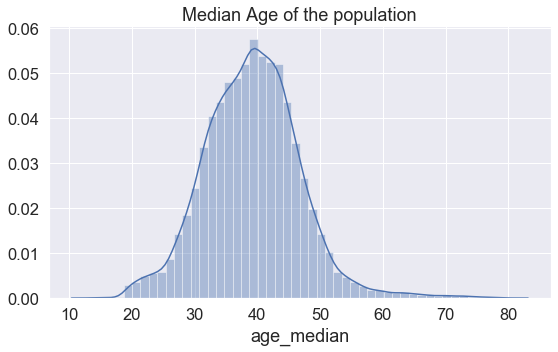

In [42]:
# plotting the median age
plt.figure(figsize=(9,5))
sns.distplot(df_train['age_median'])
plt.title('Median Age of the population')
plt.show()

The age of the population is mostly between 20 to 60 years with peak age around 39 years old. The median age distribution is slightly positively skewed.

Plotting the median age in a boxplot

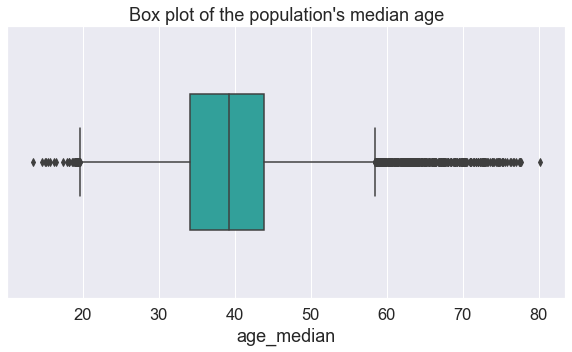

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(df_train['age_median'], width=0.5, color='lightseagreen' )
plt.title("Box plot of the population's median age")
plt.show()

### 6. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [44]:
df_train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [45]:
df_train['pop_bins']=pd.cut(df_train['pop'], bins=5, labels=['very low','low','medium','high','very high'])

In [46]:
df_train[['pop','pop_bins']]

pop  pop_bins
UID                    
267822   5230  very low
246444   2633  very low
245683   6881  very low
279653   2700  very low
247218   5637  very low
...       ...       ...
279212   1847  very low
277856   4155  very low
233000   2829  very low
287425  11542       low
265371   3726  very low

[27321 rows x 2 columns]

In [47]:
df_train['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

#### Analyze the married, separated, and divorced population for these population brackets

In [48]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].count()

married  separated  divorced
pop_bins                               
very low     27058      27058     27058
low            246        246       246
medium           9          9         9
high             7          7         7
very high        1          1         1

In [49]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

The very high population group has more married people followed by the medium group while the very low to low population groups have more divorcees and separated people than other groups. 

#### Visualize using appropriate chart type

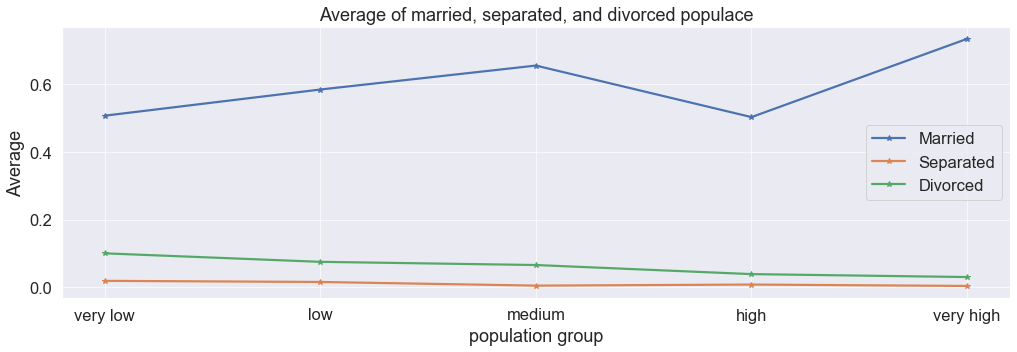

In [50]:
pop_bin_agg=df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
x_axis=['very low', 'low', 'medium', 'high', 'very high']
plt.figure(figsize=(17,5))
bp=plt.plot(x_axis, pop_bin_agg, marker='*', lw=2.2)
plt.legend(bp[:3],['Married','Separated','Divorced'],loc='best')
plt.title('Average of married, separated, and divorced populace')
plt.xlabel('population group')
plt.ylabel('Average')
plt.grid(linewidth=0.7)
plt.show()

### 7. Please detail your observations for rent as a percentage of income at an overall level and for different states.

In [51]:
rent_state_mean=df_train.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

mean
state                  
Alabama      774.004927
Alaska      1185.763570
Arizona     1097.753511
Arkansas     720.918575
California  1471.133857

In [52]:
income_state_mean=df_train.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

mean
state                   
Alabama     67030.064213
Alaska      92136.545109
Arizona     73328.238798
Arkansas    64765.377850
California  87655.470820

In [53]:
rent_pct_income=rent_state_mean['mean']/income_state_mean['mean']
rent_pct_income.head(10)

state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011131
California              0.016783
Colorado                0.013529
Connecticut             0.012637
Delaware                0.012929
District of Columbia    0.013198
Florida                 0.015772
Name: mean, dtype: float64

Calculating the rent as a percentage of family income:

In [54]:
df_train['rent_mean'].sum()/df_train['family_mean'].sum()*100

1.3358170721473936

### 8. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [55]:
cor=df_train[['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']].corr()

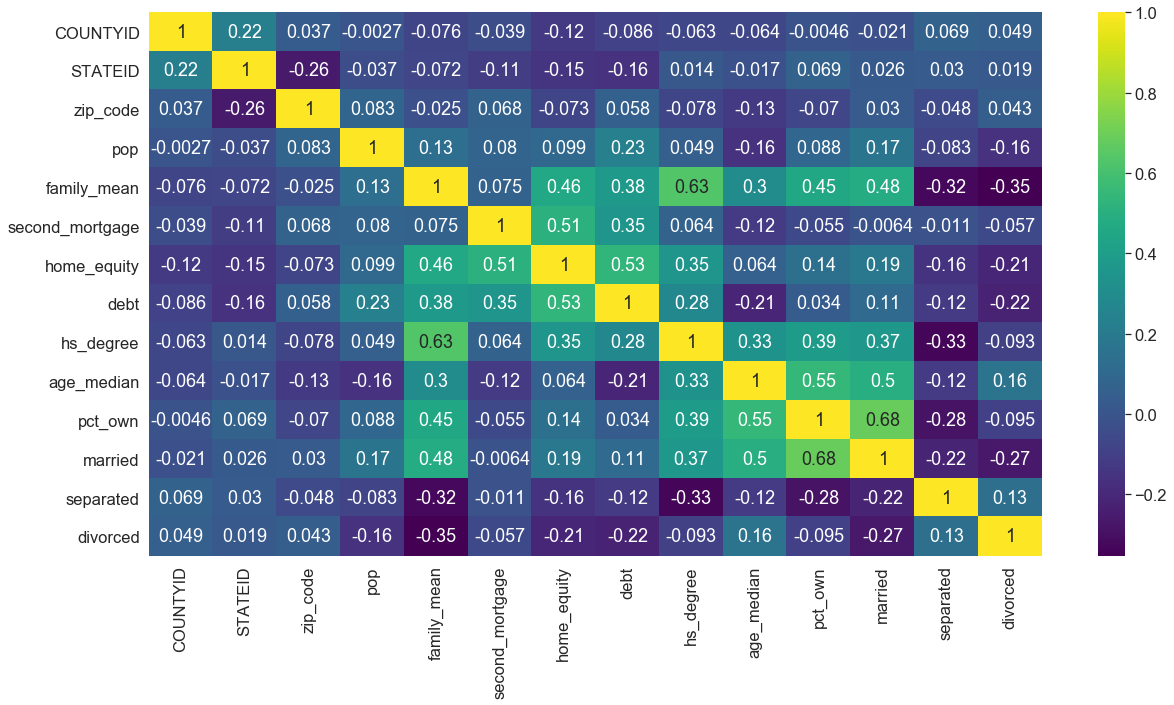

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(cor, annot=True,cmap='viridis')
plt.show()

There is a significant positive correlation between high school degree and family income
There is a significant positive correlation between percentage ownership and married
There is an average correlation between median age and percentage ownership

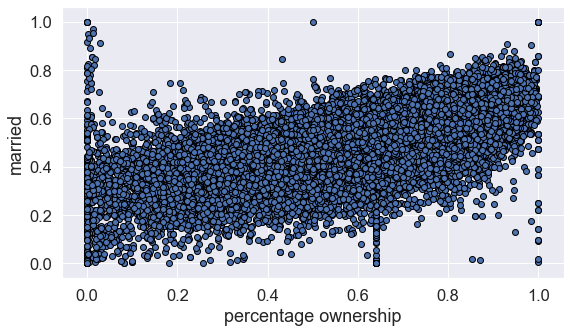

In [57]:
# confirming the relationship with scatter plot
plt.figure(figsize=(9,5))
plt.scatter(df_train['pct_own'], df_train['married'], edgecolor='black')
plt.xlabel('percentage ownership')
plt.ylabel('married')
plt.show()

### 9.

__1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables.__

__2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings.__ 

__Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. Following are the list of latent variables:__

- Highschool graduation rates 
- Median population age 
- Second mortgage statistics 
- Percent own 
- Bad debt expense

In [58]:
#!pip install factor_analyzer
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

To perform factor analysis, we need to evaluate the “factorability” of our dataset.

__Performing an adequecy test (Bartlett's Test of Sphericity):__

In [100]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
df = df_train.select_dtypes(exclude= ('object','category'))
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(6498913.816537065, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [60]:
# create factor analyzer object
fa=FactorAnalyzer(n_factors=5, rotation='varimax')

In [61]:
# fit the dataset
fa.fit(df_train.select_dtypes(exclude= ('object','category')))

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [62]:
# get the loadings
loadings = fa.loadings_

In [63]:
# get the eigenvectors and eigenvalues
eigen_values, vectors = fa.get_eigenvalues()

In [64]:
# do a scree plot to check if 5 factors are sufficient
# determine the x axis
xvals = range(1, df_train.select_dtypes(exclude= ('object','category')).shape[1]+1)

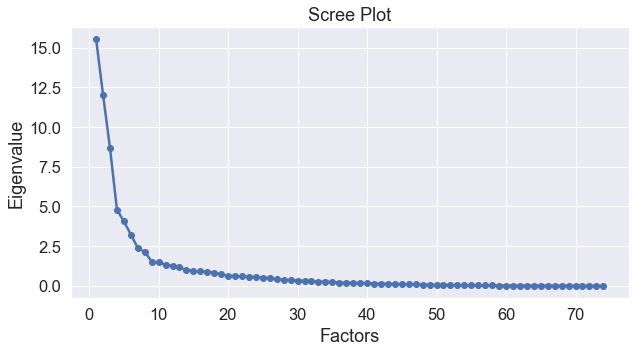

In [65]:
# scree plot
#plot a line plot to visualize how the eigenvalues change as added components increase
plt.figure(figsize=(10,5))

plt.scatter(xvals, eigen_values)
plt.plot(xvals, eigen_values, linewidth=2.5)

plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(b=True)
plt.show()

From the scree plot, we can see that the number of eigenvalues greater than one which should be considered is about 9. Hence our guess of setting n_factors as 5 was incorrect. We'll reinitialize the FactorAnalyser object with number of factors i.e. n_factors = 9 before continuing to the next step

In [66]:
# create factor analyzer object with 9 factors  
fa1=FactorAnalyzer(n_factors=9, rotation='varimax')
fa1.fit(df_train.select_dtypes(exclude= ('object','category')))
loadings = fa1.loadings_
pd.DataFrame.from_records(loadings)

0         1         2         3         4         5         6  \
0  -0.109547  0.021051 -0.056508 -0.036633 -0.034371 -0.079374 -0.019798   
1  -0.134146  0.005113 -0.022812 -0.110784 -0.036193 -0.124982  0.054587   
2  -0.051944  0.056140 -0.102027 -0.035441 -0.002270  0.001941 -0.011685   
3   0.037384  0.033232 -0.019152  0.016458 -0.054461 -0.015361 -0.062146   
4   0.086163 -0.102925 -0.037404 -0.109039  0.047056  0.144988  0.224455   
..       ...       ...       ...       ...       ...       ...       ...   
69 -0.189365 -0.090994 -0.008989  0.087784  0.169643 -0.032052 -0.362004   
70 -0.428129 -0.116818  0.247319  0.009385  0.169963 -0.029958  0.050850   
71  0.384907  0.023474  0.011922 -0.001128 -0.017603  0.740717  0.160986   
72  0.229476 -0.050776 -0.165481  0.088197  0.392931 -0.046978 -0.267896   
73  0.160273 -0.086773  0.928972 -0.071511 -0.135416 -0.022714  0.146882   

           7         8  
0   0.046086 -0.054990  
1   0.344602 -0.055352  
2  -0.882696 -0.097326  
3  -0.002022  0.008155  
4   0.106681  0.077768  
..       ...       ...  
69  0.042715  0.054129  
70 -0.054265 -0.032926  
71  0.042567  0.236084  
72  0.098614  0.047471  
73  0.012302 -0.057106  

[74 rows x 9 columns]

The values of the loadngs show the weight or importance of each of the factor against each of the features being considered. Specific factors have high loading values for specific variables.

Displaying the variable names against corresponding loading values:

In [67]:
df_factors = pd.DataFrame.from_records(loadings)
var_list = df_train.select_dtypes(exclude= ('object','category')).columns
df_factors.index = var_list
df_factors.head()

0         1         2         3         4         5  \
COUNTYID  -0.109547  0.021051 -0.056508 -0.036633 -0.034371 -0.079374   
STATEID   -0.134146  0.005113 -0.022812 -0.110784 -0.036193 -0.124982   
zip_code  -0.051944  0.056140 -0.102027 -0.035441 -0.002270  0.001941   
area_code  0.037384  0.033232 -0.019152  0.016458 -0.054461 -0.015361   
lat        0.086163 -0.102925 -0.037404 -0.109039  0.047056  0.144988   

                  6         7         8  
COUNTYID  -0.019798  0.046086 -0.054990  
STATEID    0.054587  0.344602 -0.055352  
zip_code  -0.011685 -0.882696 -0.097326  
area_code -0.062146 -0.002022  0.008155  
lat        0.224455  0.106681  0.077768

In [68]:
# to display all rows i.e. variables
pd.set_option('display.max_rows', 100)
df_factors.head(100)

0         1         2         3         4  \
COUNTYID                    -0.109547  0.021051 -0.056508 -0.036633 -0.034371   
STATEID                     -0.134146  0.005113 -0.022812 -0.110784 -0.036193   
zip_code                    -0.051944  0.056140 -0.102027 -0.035441 -0.002270   
area_code                    0.037384  0.033232 -0.019152  0.016458 -0.054461   
lat                          0.086163 -0.102925 -0.037404 -0.109039  0.047056   
lng                         -0.043667 -0.044471  0.084218  0.003128 -0.029874   
ALand                       -0.042278 -0.025940  0.020391 -0.078861 -0.039805   
AWater                      -0.002804 -0.017321 -0.010643 -0.031329 -0.010323   
pop                          0.115959  0.965323 -0.094876  0.000939  0.098009   
male_pop                     0.115061  0.929991 -0.119567 -0.013932  0.085332   
female_pop                   0.110521  0.951614 -0.064634  0.016188  0.107759   
rent_mean                    0.802093  0.063399 -0.070654  0.088823 -0.108488   
rent_median                  0.756896  0.061475 -0.083058  0.083535 -0.117130   
rent_stdev                   0.665911  0.033237  0.035858  0.081513  0.059469   
rent_sample_weight          -0.330399  0.220221 -0.137184  0.043283  0.754067   
rent_samples                 0.006445  0.317729 -0.215913  0.075332  0.900358   
rent_gt_10                  -0.033430  0.052812 -0.025041  0.409173  0.032463   
rent_gt_15                  -0.021247  0.039124 -0.036395  0.629020  0.063524   
rent_gt_20                  -0.046298  0.004406 -0.033458  0.779176  0.082830   
rent_gt_25                  -0.060717 -0.012503 -0.045226  0.866753  0.076688   
rent_gt_30                  -0.063456 -0.015989 -0.065598  0.907246  0.046637   
rent_gt_35                  -0.047035 -0.022323 -0.081557  0.904077  0.027767   
rent_gt_40                  -0.043798 -0.029845 -0.092458  0.869197  0.025445   
rent_gt_50                  -0.033083 -0.049080 -0.097953  0.768125  0.036062   
universe_samples            -0.013196  0.344808 -0.193584  0.072478  0.893620   
used_samples                 0.009990  0.327299 -0.201316  0.068702  0.897225   
hi_mean                      0.843018  0.106235  0.062239 -0.230847 -0.276405   
hi_median                    0.791099  0.116421  0.033264 -0.246165 -0.317981   
hi_stdev                     0.844287  0.064038  0.140990 -0.139722 -0.111434   
hi_sample_weight            -0.330977  0.764682  0.120032  0.084018  0.465636   
hi_samples                   0.084985  0.904402  0.120432 -0.040124  0.292738   
family_mean                  0.841083  0.068059  0.102193 -0.212156 -0.188057   
family_median                0.815653  0.067379  0.083216 -0.215554 -0.209750   
family_stdev                 0.767400  0.046241  0.146185 -0.114534 -0.028946   
family_sample_weight        -0.311077  0.849211  0.053942  0.058188  0.124783   
family_samples               0.118382  0.953649  0.090540 -0.065595 -0.053785   
hc_mortgage_mean             0.941781 -0.011285 -0.017085  0.014060  0.067705   
hc_mortgage_median           0.925181 -0.015306 -0.035261  0.017222  0.063508   
hc_mortgage_stdev            0.769306  0.004450  0.148915 -0.026177  0.047386   
hc_mortgage_sample_weight   -0.298217  0.745823  0.158376 -0.106538 -0.246774   
hc_mortgage_samples          0.209977  0.782744  0.098468 -0.098370 -0.280392   
hc_mean                      0.842108 -0.046174  0.007719 -0.006742  0.074917   
hc_median                    0.807754 -0.044910 -0.007025 -0.004537  0.074043   
hc_stdev                     0.673360 -0.013496  0.114443 -0.012578  0.079257   
hc_samples                  -0.109344  0.596385  0.454222 -0.077657 -0.218534   
hc_sample_weight            -0.316504  0.545836  0.412491 -0.074516 -0.217400   
home_equity_second_mortgage  0.003770  0.031056 -0.110391  0.022057  0.034681   
second_mortgage              0.030461  0.026666 -0.110417  0.034066  0.034418   
home_equity                  0.383483  0.025250  0.016059 -0.008009

In [69]:
df_factors.loc[df_factors[0] >=0.5]

0         1         2         3         4  \
rent_mean           0.802093  0.063399 -0.070654  0.088823 -0.108488   
rent_median         0.756896  0.061475 -0.083058  0.083535 -0.117130   
rent_stdev          0.665911  0.033237  0.035858  0.081513  0.059469   
hi_mean             0.843018  0.106235  0.062239 -0.230847 -0.276405   
hi_median           0.791099  0.116421  0.033264 -0.246165 -0.317981   
hi_stdev            0.844287  0.064038  0.140990 -0.139722 -0.111434   
family_mean         0.841083  0.068059  0.102193 -0.212156 -0.188057   
family_median       0.815653  0.067379  0.083216 -0.215554 -0.209750   
family_stdev        0.767400  0.046241  0.146185 -0.114534 -0.028946   
hc_mortgage_mean    0.941781 -0.011285 -0.017085  0.014060  0.067705   
hc_mortgage_median  0.925181 -0.015306 -0.035261  0.017222  0.063508   
hc_mortgage_stdev   0.769306  0.004450  0.148915 -0.026177  0.047386   
hc_mean             0.842108 -0.046174  0.007719 -0.006742  0.074917   
hc_median           0.807754 -0.044910 -0.007025 -0.004537  0.074043   
hc_stdev            0.673360 -0.013496  0.114443 -0.012578  0.079257   

                           5         6         7         8  
rent_mean           0.091648  0.072357 -0.194503  0.178324  
rent_median         0.089650  0.056370 -0.183389  0.183250  
rent_stdev          0.059008  0.041288 -0.114414  0.030600  
hi_mean             0.105713  0.254691 -0.058843  0.101571  
hi_median           0.111081  0.242243 -0.058679  0.138888  
hi_stdev            0.075784  0.251568 -0.038541 -0.022916  
family_mean         0.088356  0.339389 -0.026314  0.047936  
family_median       0.082282  0.318477 -0.019087  0.060646  
family_stdev        0.075898  0.292554 -0.029630 -0.033467  
hc_mortgage_mean    0.133733 -0.017837 -0.040136  0.051227  
hc_mortgage_median  0.125623 -0.025481 -0.039357  0.063862  
hc_mortgage_stdev   0.115863  0.039323 -0.047727 -0.059799  
hc_mean             0.044208  0.062058  0.246132  0.044073  
hc_median           0.040859  0.059130  0.247050  0.052870  
hc_stdev           -0.007083  0.018032  0.093318 -0.098569

In [70]:
df_factors.loc[df_factors[1] >=0.5]

0         1         2         3         4  \
pop                        0.115959  0.965323 -0.094876  0.000939  0.098009   
male_pop                   0.115061  0.929991 -0.119567 -0.013932  0.085332   
female_pop                 0.110521  0.951614 -0.064634  0.016188  0.107759   
hi_sample_weight          -0.330977  0.764682  0.120032  0.084018  0.465636   
hi_samples                 0.084985  0.904402  0.120432 -0.040124  0.292738   
family_sample_weight      -0.311077  0.849211  0.053942  0.058188  0.124783   
family_samples             0.118382  0.953649  0.090540 -0.065595 -0.053785   
hc_mortgage_sample_weight -0.298217  0.745823  0.158376 -0.106538 -0.246774   
hc_mortgage_samples        0.209977  0.782744  0.098468 -0.098370 -0.280392   
hc_samples                -0.109344  0.596385  0.454222 -0.077657 -0.218534   
hc_sample_weight          -0.316504  0.545836  0.412491 -0.074516 -0.217400   
male_age_sample_weight     0.088684  0.832330 -0.225960  0.038357  0.092800   
male_age_samples           0.115041  0.935986 -0.121899 -0.013818  0.079913   
female_age_sample_weight   0.087383  0.887359 -0.196537  0.068654  0.116426   
female_age_samples         0.110630  0.959652 -0.067236  0.017255  0.102485   

                                  5         6         7         8  
pop                        0.040928 -0.026565 -0.038284  0.044272  
male_pop                   0.037152 -0.038424 -0.058149  0.016345  
female_pop                 0.043347 -0.010323 -0.016022  0.071404  
hi_sample_weight          -0.022493 -0.001095  0.037871 -0.032331  
hi_samples                 0.039348  0.148189  0.015299  0.044572  
family_sample_weight      -0.012451 -0.183958 -0.000589  0.005723  
family_samples             0.058157  0.035707 -0.003668  0.079879  
hc_mortgage_sample_weight  0.039305  0.223286  0.052591  0.123182  
hc_mortgage_samples        0.140387  0.250910  0.008787  0.215630  
hc_samples                -0.143041  0.094442  0.113924 -0.387559  
hc_sample_weight          -0.159121  0.041340  0.060466 -0.389767  
male_age_sample_weight     0.010776  0.009208 -0.041559 -0.059145  
male_age_samples           0.038131 -0.037640 -0.055958  0.015620  
female_age_sample_weight   0.023199  0.037480  0.003813 -0.015075  
female_age_samples         0.044388 -0.009769 -0.012309  0.071704

In [71]:
df_factors.loc[df_factors[2] >=0.5]

0         1         2         3         4         5  \
male_age_mean      0.140299 -0.115819  0.884140 -0.066137 -0.052420 -0.047477   
male_age_median    0.182481 -0.079909  0.850430 -0.091664 -0.145041 -0.022508   
male_age_stdev    -0.055584  0.052899  0.566435 -0.058178 -0.177624 -0.006758   
female_age_mean    0.088745 -0.121039  0.900723 -0.021322 -0.004553 -0.043201   
female_age_median  0.123574 -0.084263  0.891629 -0.047428 -0.121844 -0.021891   
age_median         0.160273 -0.086773  0.928972 -0.071511 -0.135416 -0.022714   

                          6         7         8  
male_age_mean      0.146271 -0.005091 -0.103932  
male_age_median    0.156083 -0.002271 -0.074342  
male_age_stdev    -0.031537  0.038683  0.017028  
female_age_mean    0.120223  0.031726 -0.059688  
female_age_median  0.129923  0.030878 -0.043994  
age_median         0.146882  0.012302 -0.057106

In [72]:
df_factors.loc[df_factors[3] >=0.5]

0         1         2         3         4         5  \
rent_gt_15 -0.021247  0.039124 -0.036395  0.629020  0.063524  0.033981   
rent_gt_20 -0.046298  0.004406 -0.033458  0.779176  0.082830  0.014117   
rent_gt_25 -0.060717 -0.012503 -0.045226  0.866753  0.076688  0.002121   
rent_gt_30 -0.063456 -0.015989 -0.065598  0.907246  0.046637 -0.001946   
rent_gt_35 -0.047035 -0.022323 -0.081557  0.904077  0.027767 -0.011128   
rent_gt_40 -0.043798 -0.029845 -0.092458  0.869197  0.025445 -0.011709   
rent_gt_50 -0.033083 -0.049080 -0.097953  0.768125  0.036062 -0.016991   

                   6         7         8  
rent_gt_15 -0.040679 -0.055019  0.308964  
rent_gt_20 -0.098491 -0.040860  0.217041  
rent_gt_25 -0.128380 -0.020340  0.100939  
rent_gt_30 -0.125600 -0.006545 -0.016380  
rent_gt_35 -0.113352  0.009211 -0.089976  
rent_gt_40 -0.104768  0.023605 -0.123319  
rent_gt_50 -0.098340  0.038267 -0.129091

In [73]:
df_factors.loc[df_factors[4] >=0.5]

0         1         2         3         4  \
rent_sample_weight -0.330399  0.220221 -0.137184  0.043283  0.754067   
rent_samples        0.006445  0.317729 -0.215913  0.075332  0.900358   
universe_samples   -0.013196  0.344808 -0.193584  0.072478  0.893620   
used_samples        0.009990  0.327299 -0.201316  0.068702  0.897225   

                           5         6         7         8  
rent_sample_weight -0.030647 -0.077093  0.045303  0.009385  
rent_samples        0.004381 -0.052599 -0.051986  0.073176  
universe_samples   -0.007240 -0.062736 -0.048765  0.052501  
used_samples        0.007670 -0.052078 -0.057948  0.082626

In [74]:
df_factors.loc[df_factors[5] >=0.5]

0         1         2         3         4  \
home_equity_second_mortgage  0.003770  0.031056 -0.110391  0.022057  0.034681   
second_mortgage              0.030461  0.026666 -0.110417  0.034066  0.034418   
home_equity                  0.383483  0.025250  0.016059 -0.008009 -0.019594   
bad_debt                     0.384907  0.023474  0.011922 -0.001128 -0.017603   

                                    5         6         7         8  
home_equity_second_mortgage  0.850955 -0.020201 -0.068297 -0.046237  
second_mortgage              0.874527 -0.028814 -0.072920 -0.045809  
home_equity                  0.719121  0.170700  0.047886  0.241330  
bad_debt                     0.740717  0.160986  0.042567  0.236084

In [75]:
df_factors.loc[df_factors[6] >=0.5]

0         1         2         3         4         5  \
hs_degree         0.350315  0.039005  0.153667 -0.153772 -0.041508  0.097360   
hs_degree_male    0.365015  0.041892  0.141234 -0.148702 -0.025525  0.097946   
hs_degree_female  0.318343  0.035745  0.165215 -0.160569 -0.067182  0.094992   

                         6         7         8  
hs_degree         0.876566  0.030043  0.047377  
hs_degree_male    0.807987  0.014297  0.058462  
hs_degree_female  0.812123  0.042210  0.038496

In [76]:
df_factors.loc[df_factors[7] >=0.5]

0         1         2         3         4        5         6  \
lng -0.043667 -0.044471  0.084218  0.003128 -0.029874 -0.03975  0.031656   

            7         8  
lng  0.944841  0.075328

In [77]:
df_factors.loc[df_factors[8] >=0.5]

0         1         2         3        4         5         6  \
debt  0.317333  0.141196 -0.267101  0.000101 -0.02602  0.376395  0.172216   

             7         8  
debt -0.112723  0.629457

In [78]:
# get variance of each of the factors
fa1.get_factor_variance()

(array([12.07221405, 11.53424891,  6.19099124,  5.4884611 ,  5.01784364,
         4.12138374,  3.7269815 ,  2.17702002,  1.93097416]),
 array([0.16313803, 0.15586823, 0.08366204, 0.07416839, 0.0678087 ,
        0.05569437, 0.05036461, 0.02941919, 0.02609425]),
 array([0.16313803, 0.31900626, 0.4026683 , 0.47683669, 0.54464539,
        0.60033977, 0.65070438, 0.68012357, 0.70621782]))

In [79]:
arr = fa1.get_factor_variance()
df_variance = pd.DataFrame(arr, columns =['Factor 0', 'Factor 1', 'Factor 2', 'Factor 3', 'Factor 4','Factor 5','Factor 6','Factor 7','Factor 8']) 
df_variance.index = ['SS Loadings','Proportion Var','Cumulative Var']
df_variance

Factor 0   Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
SS Loadings     12.072214  11.534249  6.190991  5.488461  5.017844  4.121384   
Proportion Var   0.163138   0.155868  0.083662  0.074168  0.067809  0.055694   
Cumulative Var   0.163138   0.319006  0.402668  0.476837  0.544645  0.600340   

                Factor 6  Factor 7  Factor 8  
SS Loadings     3.726982  2.177020  1.930974  
Proportion Var  0.050365  0.029419  0.026094  
Cumulative Var  0.650704  0.680124  0.706218

~71% cumulative Variance is explained by the 9 factors.

#### Naming the factors with some of the latent variable names provided:
- __Factor 1__ has high factor loadings for rent_mean,rent_median, rent_stdev,hi_mean, hi_median, hi_stdev, family_mean, family_median, family_stdev, hc_mortgage_mean, hc_mortgage_median, hc_mortgage_stdev,hc_mean, hc_median, hc_stdev (__Income__)
- __Factor 2__ has high factor loadings for pop, male_pop,female_pop, hi_sample_weight,family_samples, hc_mortgage_sample_weight, hc_mortgage_samples,hc_samples,hc_sample_weight,male_age_sample_weight,male_age_samples,female_age_sample_weight,female_age_samples (__Percent Owned__)
- __Factor 3__ has high factor loadings for male_age_mean,male_age_median, male_age_stdev, female_age_mean, female_age_median, age_median (__Median Population Age__)
- __Factor 4__ has high factor loadings for rent_gt_15, rent_gt_20, rent_gt_25, rent_gt_30, rent_gt_35, rent_gt_40, rent_gt_50 (__Rent__)
- __Factor 5__ has high factor loadings for rent_sample_weight, rent_samples, universe_samples, used_samples (__Samples__)
- __Factor 6__ has high factor loadings for home_equity_second_mortgage, second_mortgage, home_equity, bad_debt (__Second Mortgage Statistics__)
- __Factor 7__ has high factor loadings for hs_degree, hs_degree_male, hs_degree_female (__High School Graduation__)
- __Factor 8__ has high factor loadings for lng (__Longitude__)
- __Factor 9__ has high factor loadings for debt (__Debt__)

### 10. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan; 

please refer - ‘deplotment_RE.xlsx’.

Column hc_mortgage_mean is predicted variable. This is mean monthly mortgage and owner costs of specified geographical location.

Note: Exclude loans from prediction model which have NaN values for hc_mortgage_mean. NaN represents not a number/missing values.


In [80]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [81]:
# converting the geo loc type to numeric
df_train['type'].unique()
type_dict={'type':{'City':1, 
                   'Urban':2, 
                   'Town':3, 
                   'CDP':4, 
                   'Village':5, 
                   'Borough':6}
          }
df_train.replace(type_dict,inplace=True)

In [82]:
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [83]:
df_test.replace(type_dict,inplace=True)

In [84]:
df_test['type'].unique()

array([4, 1, 6, 3, 5, 2], dtype=int64)

In [85]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']

In [86]:
x_train=df_train[feature_cols]
y_train=df_train['hc_mortgage_mean']

In [87]:
x_test=df_test[feature_cols]
y_test=df_test['hc_mortgage_mean']

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [89]:
x_train.head()

COUNTYID  STATEID  zip_code  type   pop  family_mean  second_mortgage  \
UID                                                                             
267822        53       36     13346     1  5230  67994.14790          0.02077   
246444       141       18     46616     1  2633  50670.10337          0.02222   
245683        63       18     46122     1  6881  95262.51431          0.00000   
279653       127       72       927     2  2700  56401.68133          0.01086   
247218       161       20     66502     1  5637  54053.42396          0.05426   

        home_equity     debt  hs_degree  age_median  pct_own  married  \
UID                                                                     
267822      0.08919  0.52963    0.89288   44.666665  0.79046  0.57851   
246444      0.04274  0.60855    0.90487   34.791665  0.52483  0.34886   
245683      0.09512  0.73484    0.94288   41.833330  0.85331  0.64745   
279653      0.01086  0.52714    0.91500   49.750000  0.65037  0.47257   
247218      0.05426  0.51938    1.00000   22.000000  0.13046  0.12356   

        separated  divorced  
UID                          
267822    0.01240   0.08770  
246444    0.01426   0.09030  
245683    0.01607   0.10657  
279653    0.02021   0.10106  
247218    0.00000   0.03109

In [90]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

#### Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

In [91]:
linereg=LinearRegression()
linereg.fit(x_train_scaled,y_train)

LinearRegression()

In [92]:
y_pred=linereg.predict(x_test_scaled)

In [93]:
print("R2 score of the linear regression model:", r2_score(y_test,y_pred))
print("RMSE of the linear regression model:", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score of the linear regression model: 0.7348210754610929
RMSE of the linear regression model: 323.10188949846344


The Accuracy and R2 score of 73% which is greater than the 60% benchmark was achieved, but let's compare the model result at state level

#### Modeling at the state level. There are 52 states in USA.

In [94]:
state=df_train['STATEID'].unique()
# selecting a few IDs
state[0:5]

array([36, 18, 72, 20,  1], dtype=int64)

In [95]:
for i in [20,1,45]:
    print("State ID -",i)
    
    x_train_nation=df_train[df_train['COUNTYID']==i][feature_cols]
    y_train_nation=df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
    
    x_test_nation=df_test[df_test['COUNTYID']==i][feature_cols]
    y_test_nation=df_test[df_test['COUNTYID']==i]['hc_mortgage_mean']
    
    x_train_scaled_nation=sc.fit_transform(x_train_nation)
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
    
    linereg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=linereg.predict(x_test_scaled_nation)
    
    print("R2 score of linear regression model for state,",i,"is" ,r2_score(y_test_nation,y_pred_nation))
    print("RMSE of linear regression model for state,",i,"is" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID - 20
R2 score of linear regression model for state, 20 is 0.6046603766461807
RMSE of linear regression model for state, 20 is 307.9718899931473


State ID - 1
R2 score of linear regression model for state, 1 is 0.8104382475484616
RMSE of linear regression model for state, 1 is 307.8275861848435


State ID - 45
R2 score of linear regression model for state, 45 is 0.7887446497855252
RMSE of linear regression model for state, 45 is 225.69615420724136




In [96]:
# check the residuals
residuals=y_test-y_pred
residuals

UID
255504    281.969088
252676    -69.935775
276314    190.761969
248614   -157.290627
286865     -9.887017
             ...    
238088    -67.541646
242811    -41.578757
250127   -127.427569
241096   -330.820475
287763    217.760642
Name: hc_mortgage_mean, Length: 11709, dtype: float64

(array([6.000e+00, 3.000e+00, 2.900e+01, 7.670e+02, 7.823e+03, 2.716e+03,
        3.010e+02, 4.900e+01, 1.200e+01, 3.000e+00]),
 array([-2515.04284233, -1982.92661329, -1450.81038425,  -918.69415521,
         -386.57792617,   145.53830287,   677.65453191,  1209.77076095,
         1741.88698999,  2274.00321903,  2806.11944807]),
 <a list of 10 Patch objects>)

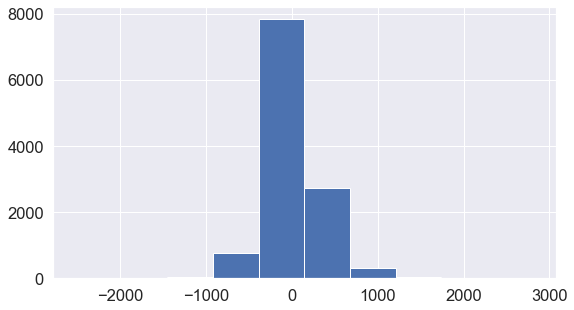

In [97]:
# plotting the distribution of residuals:
plt.figure(figsize=(9,5))
plt.hist(residuals) 

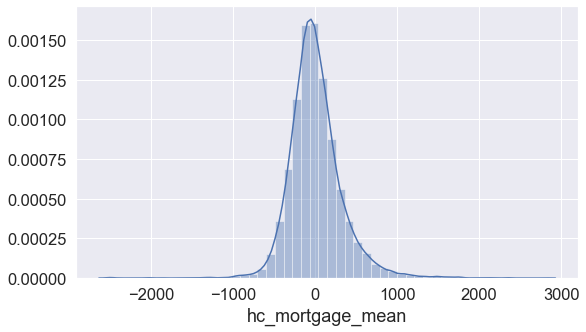

In [98]:
# Examine the normal plot of the residuals
plt.figure(figsize=(9,5))
sns.distplot(residuals)

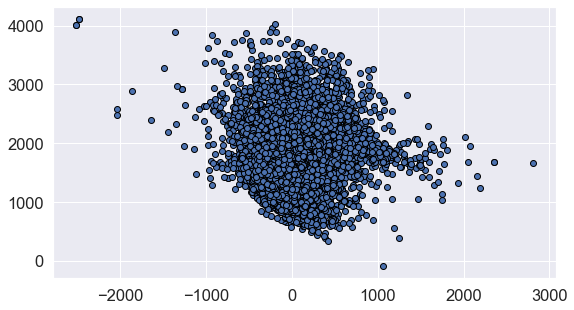

In [99]:
# residual plot - independence
plt.figure(figsize=(9,5))
plt.scatter(residuals,y_pred, edgecolor='black') 

### 11. Create a dashboard in tableau

__Link to Tableau part of the project:__
https://public.tableau.com/views/CaptsoneProject1_RealEstateAnalysis/Realestateanalysis?:language=en&:display_count=y&:origin=viz_share_link
                